In [112]:
# Importing liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
#Importing Data
df = pd.read_csv(r"C:\Users\faiyz\ML\Housing Prediction with Polynomial Regression\DATASET\housing_train.csv")

In [114]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [116]:
##DATA CLEANING

In [117]:
df_cleaned = df.loc[:,df.isnull().mean()<0.5].copy()

In [118]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [119]:
df_cleaned.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [120]:
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [121]:
df_cleaned.isnull().sum()<1

Id                True
MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea           True
                 ...  
MoSold            True
YrSold            True
SaleType          True
SaleCondition     True
SalePrice         True
Length: 77, dtype: bool

In [122]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [123]:
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum()>1 and df_cleaned[col].dtype == 'object':
        print('object',col)
    elif df_cleaned[col].isnull().sum()>1 and df_cleaned[col].dtype !='numerical':
        print('numerical',col)

numerical LotFrontage
object MasVnrType
numerical MasVnrArea
object BsmtQual
object BsmtCond
object BsmtExposure
object BsmtFinType1
object BsmtFinType2
object FireplaceQu
object GarageType
numerical GarageYrBlt
object GarageFinish
object GarageQual
object GarageCond


In [124]:
df_cleaned[['FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','GarageCond','GarageQual','GarageFinish','GarageType']]

,FireplaceQu,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,MasVnrType,GarageCond,GarageQual,GarageFinish,GarageType
0,NaN,Unf,GLQ,No,TA,Gd,BrkFace,TA,TA,RFn,Attchd
1,TA,Unf,ALQ,Gd,TA,Gd,None,TA,TA,RFn,Attchd
2,TA,Unf,GLQ,Mn,TA,Gd,BrkFace,TA,TA,RFn,Attchd
3,Gd,Unf,ALQ,No,Gd,TA,None,TA,TA,Unf,Detchd
4,TA,Unf,GLQ,Av,TA,Gd,BrkFace,TA,TA,RFn,Attchd
...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Unf,Unf,No,TA,Gd,None,TA,TA,RFn,Attchd
1456,TA,Rec,ALQ,No,TA,Gd,Stone,TA,TA,Unf,Attchd
1457,Gd,Unf,GLQ,No,Gd,TA,None,TA,TA,RFn,Attchd
1458,NaN,Rec,GLQ,Mn,TA,TA,None,TA,TA,Unf,Attchd


In [125]:
df_cleaned[['FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','GarageCond','GarageQual','GarageFinish','GarageType']].fillna('NONE',inplace=True)

C:\Users\faiyz\AppData\Local\Temp/ipykernel_3456/864986322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','GarageCond','GarageQual','GarageFinish','GarageType']].fillna('NONE',inplace=True)


In [126]:
df_cleaned[['FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType','GarageCond','GarageQual','GarageFinish','GarageType']].isnull().sum()

FireplaceQu     690
BsmtFinType2     38
BsmtFinType1     37
BsmtExposure     38
BsmtCond         37
BsmtQual         37
MasVnrType        8
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
dtype: int64

In [127]:
df_cleaned.loc[:, cols] = df_cleaned[cols].fillna('NONE')

In [128]:
df_cleaned.isnull().sum().sort_values(ascending = False)

FireplaceQu     690
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
               ... 
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
SalePrice         0
Length: 77, dtype: int64

In [129]:
df_cleaned[['LotFrontage','GarageYrBlt','MasVnrArea']].fillna(0,inplace=True)

C:\Users\faiyz\AppData\Local\Temp/ipykernel_3456/2311671447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['LotFrontage','GarageYrBlt','MasVnrArea']].fillna(0,inplace=True)


In [130]:
cols = ['LotFrontage','GarageYrBlt','MasVnrArea']

In [131]:
df_cleaned.loc[:, cols] = df_cleaned[cols].fillna('NONE')

In [132]:
df_cleaned.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [133]:
##CONVERTING STRING VALUES TO NUMERICAL VALUES

In [134]:
df_cleaned.select_dtypes(include = object).describe()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,770,1379,1460,1379,1379,1379,1460,1460,1460
unique,5,111,2,4,4,2,5,3,25,9,...,7,5,6,98,3,5,5,3,9,6
top,RL,NONE,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Typ,Gd,Attchd,NONE,Unf,TA,TA,Y,WD,Normal
freq,1151,259,1454,925,1311,1459,1052,1382,225,1260,...,1360,380,870,81,605,1311,1326,1340,1267,1198


In [155]:
df_num = df_cleaned.select_dtypes(exclude = object)
df_obj = df_cleaned.select_dtypes(include = object)

In [156]:
df_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [157]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotFrontage    1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  MasVnrArea     1460 non-null

In [158]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [159]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 734 entries, MSZoning_FV to SaleCondition_Partial
dtypes: uint8(734)
memory usage: 1.0 MB


In [160]:
df_obj.describe()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_24.0,LotFrontage_30.0,LotFrontage_32.0,LotFrontage_33.0,LotFrontage_34.0,LotFrontage_35.0,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.044521,0.010959,0.788356,0.149315,0.013014,0.004110,0.003425,0.000685,0.006849,0.006164,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.206319,0.104145,0.408614,0.356521,0.113372,0.063996,0.058440,0.026171,0.082505,0.078298,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 734 entries, MSZoning_FV to SaleCondition_Partial
dtypes: uint8(734)
memory usage: 1.0 MB


In [162]:
df_final = pd.concat([df_num],axis=1)


In [163]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

# EDA

In [ ]:
##SALE PRICE CORRELATION

In [100]:
df_final.corr(method = 'pearson')

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


In [6]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [7]:
##LotArea        
df['LotArea'].unique()

array([ 8450,  9600, 11250, ..., 17217, 13175,  9717], dtype=int64)

In [47]:
data_correlations = df_final.corr(method = 'pearson')
data_correlations['SalePrice'].sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
Fireplaces       0.466929
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

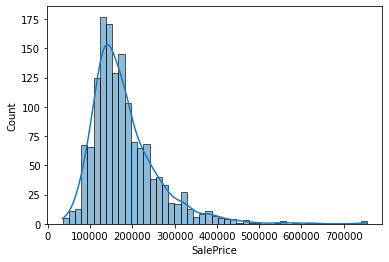

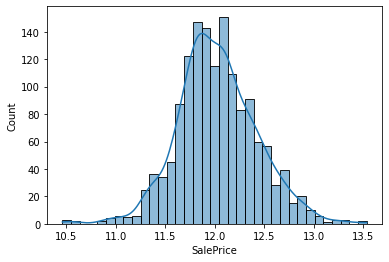

In [101]:
# Distribution of target
sns.histplot(df_final["SalePrice"], kde=True)
plt.show()

# Log-transform check
sns.histplot(np.log1p(df_final["SalePrice"]), kde=True)
plt.show()

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
Name: SalePrice, dtype: float64


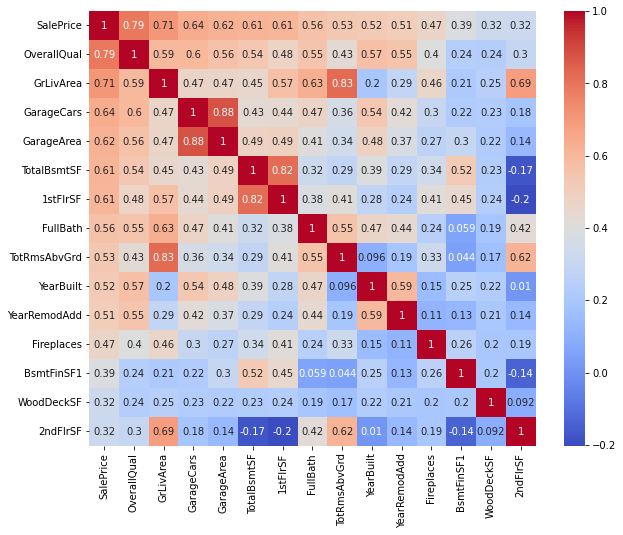

In [102]:
corr = df_final.corr()
top_corr = corr["SalePrice"].sort_values(ascending=False).head(15)

print(top_corr)

plt.figure(figsize=(10,8))
sns.heatmap(corr[top_corr.index].loc[top_corr.index], annot=True, cmap="coolwarm")
plt.show()

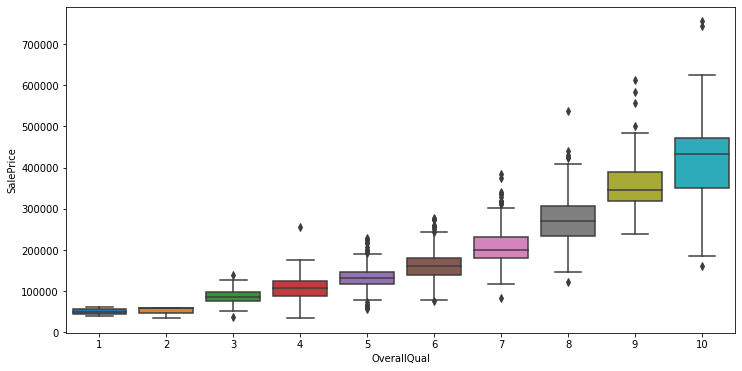

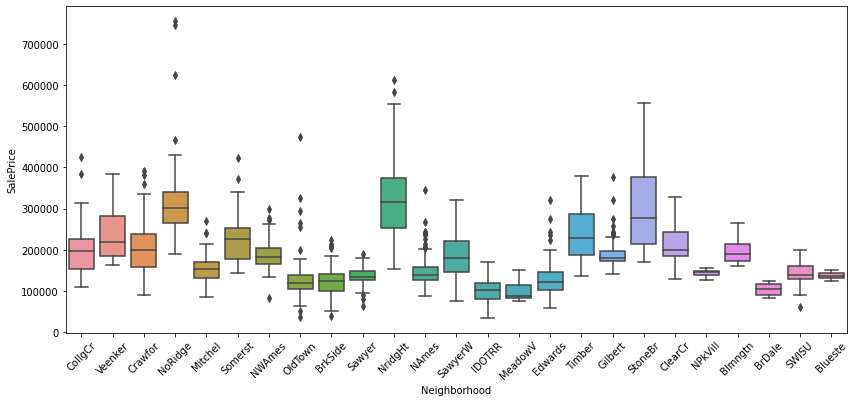

In [103]:
##For key categorical features (Neighborhood, HouseStyle, OverallQual):
plt.figure(figsize=(12,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=df_final)
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df_final)
plt.xticks(rotation=45)
plt.show()

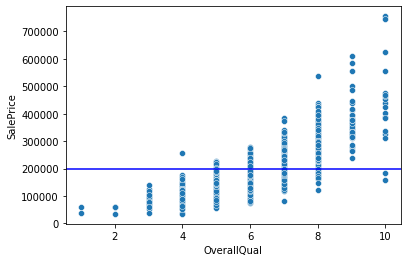

In [104]:
sns.scatterplot(data=df_final , x='OverallQual',y = 'SalePrice')
plt.axhline(y=200000, xmin=0, xmax=1,color='b')

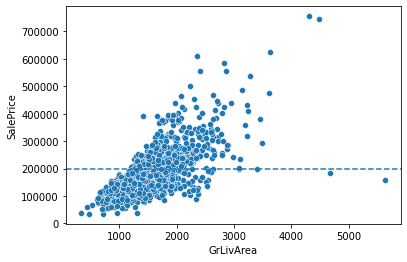

In [54]:
sns.scatterplot(data=df_final , x='GrLivArea',y='SalePrice')
plt.axhline(y=200000,linestyle='--')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

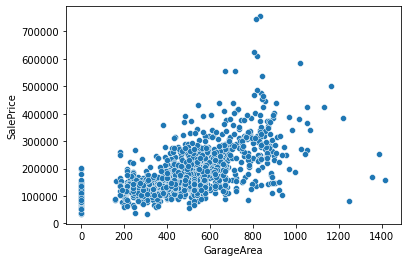

In [14]:
sns.scatterplot(data=df,x='GarageArea',y='SalePrice')

In [ ]:
##BUILDING MODEL USING LR

In [164]:
x = df_final.drop('SalePrice', axis = 1)
y = df_final['SalePrice'] 

In [180]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(x ,np.log1p(y), test_size = 0.3, random_state = 101 )

In [181]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [182]:
model.fit(x_train ,y_train )

LinearRegression()

In [183]:
y_pred=model.predict(x_test)

In [184]:
from sklearn import metrics
MSE_LiReg= metrics.mean_squared_error(y_test, y_pred)

In [185]:
RMSE_LiReg=np.sqrt(MSE_LiReg)

In [179]:
##before applying log function
print('RMSE_LiReg =', RMSE_LiReg )
print(MSE_LiReg)

RMSE_LiReg = 45123.75043338674
2036152853.1745703


In [187]:
##after applying log function
print('RMSE_LiReg =', RMSE_LiReg )
print(MSE_LiReg)

RMSE_LiReg = 0.18403948248216598
0.03387053111230348


Using Polynomial Function

In [193]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
polynomial_converter = PolynomialFeatures(degree = 2 , include_bias = False)

In [195]:
polynomial_features = polynomial_converter.fit_transform(x)
polynomial_features.shape


(1460, 629)

In [196]:
x_train, x_test, y_train, y_test = train_test_split(polynomial_features, y, test_size = 0.3, random_state = 101  )

In [198]:
polymodel_norm = LinearRegression (normalize = True)
model_fitted_normalized = polymodel_norm.fit(x_train, y_train )
print(polymodel_norm.coef_.shape)

C:\Users\faiyz\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(629,)


In [200]:
y_pred_norm = polymodel_norm.predict(x_test)
pd.DataFrame ( {'Y_pred': y_pred_norm, 'Y_test': y_test, 'Residual': y_test - y_pred_norm}).head()

,Y_pred,Y_test,Residual
1054,272659.128202,255000,-17659.128202
361,124775.297186,145000,20224.702814
1282,153324.701622,150500,-2824.701622
161,426663.297186,412500,-14163.297186
515,439020.701622,402861,-36159.701622


In [201]:
MAE = metrics.mean_absolute_error(y_pred_norm, y_test)
MSE = metrics.mean_squared_error(y_pred_norm, y_test)
RMSE = np.sqrt (MSE )
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,5.837264e+18
MSE,1.217886e+40
RMSE,1.103579e+20
